# Bibliotecas e configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyBCOPS as pb

from sklearn.ensemble import RandomForestClassifier
from keras.datasets import mnist

np.random.seed(123)

2023-07-20 22:02:17.278038: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-20 22:02:17.349388: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-20 22:02:17.350471: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 22:02:18.772950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Carregando o conjunto de dados

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

mask = y_train < 6
X_train = X_train[mask,:]
y_train = y_train[mask]

Note que as observações de classe 6 a 9 foram removidas do conjunto de treino e devem ser consideradas como atípicas pelo algoritmo.

In [3]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8 9]


# Método BCOPS

## Treinamento utilizando o algoritmo Floresta Aleatória

In [4]:
prediction_conformal = pb.BCOPS(RandomForestClassifier, X_train, y_train, X_test)

## Matriz de confusão e taxa de detecção de observações atípicas

As linhas indicam a classe verdadeira e as colunas indicam a classe predita no conjunto de teste.

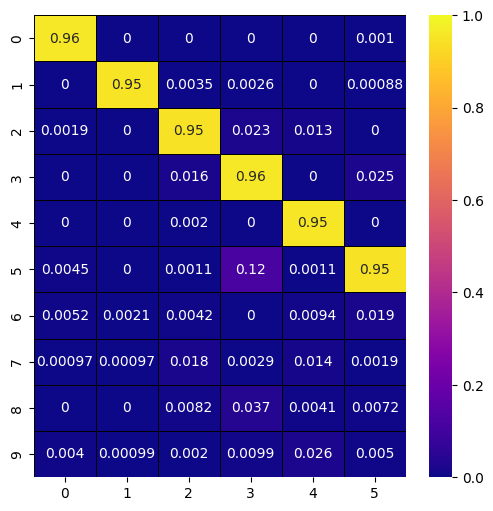

In [5]:
labels = np.unique(y_train)
evaluation = pb.evaluate_conformal(prediction_conformal, y_test, labels)
plt.figure(figsize=(6, 6))
sns.heatmap(evaluation, vmin=0, vmax=1, cmap="plasma", annot=True, linewidths=0.5, linecolor="black")
plt.show()

Podemos notar que aproximadamente $95\%$ das observações cujas classes estavam presentes durante o treinamento são classificadas corretamente.

In [6]:
y_pred = pb.prediction_sets(prediction_conformal, labels)
pb.abstention_rate(y_pred, y_test, labels)

0.9556563366087175

Temos ainda uma taxa de detecção de observações atípicas de aproximadamente $95\%$